<a href="https://colab.research.google.com/github/dibyanshu-8/Optimization_NITS/blob/main/EE381(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Population increament Model representation using linear least square method**

In [24]:
import csv
import matplotlib.pyplot as plt

In [25]:
population_data=[]
with open("/content/Population growth in India.csv.csv") as file:
    reader=csv.reader(file)
    next(reader)
    for row in reader:
      population_data.append(row)
years=[]
population=[]
for row in population_data:
    years.append(float(row[1]))
    pop_str=row[2].replace('M','').replace(',','')
    population.append(float(pop_str))


In [26]:
def matrix_multiplication(A,B):
  rows_A=len(A)
  cols_A=len(A[0])
  cols_B=len(B[0])
  result=[[0 for _ in range(cols_B)] for _ in range(rows_A)]
  for i in range(rows_A):
    for j in range(cols_B):
      for k in range(cols_A):
        result[i][j]=result[i][j]+(A[i][k]*B[k][j])
  return result

In [27]:
def matrix_transpose(A):
  rows=len(A)
  cols=len(A[0])
  return [[A[j][i] for j in range(rows)] for i in range(cols)]



In [28]:
def matrix_inverse(A):
  det=(A[0][0]*(A[1][1]*A[2][2]-A[1][2]*A[2][1])-A[0][1]*(A[1][0]*A[2][2]-A[1][2]*A[2][0])+A[0][2]*(A[1][0]*A[2][1]-A[1][1]*A[2][0]))
  if det==0:
    raise ValueError("singular matrix")
  inverse_det=1/det
  result = [[0 for _ in range(3)]for _ in range(3)]
  result[0][0]=inverse_det*(A[1][1]*A[2][2]-A[1][2]*A[2][1])
  result[0][1]=inverse_det*(A[0][2]*A[2][1]-A[0][1]*A[2][2])
  result[0][2]=inverse_det*(A[0][1]*A[1][2]-A[0][2]*A[1][1])
  result[1][0]=inverse_det*(A[1][2]*A[2][0]-A[1][0]*A[2][2])
  result[1][1]=inverse_det*(A[0][0]*A[2][2]-A[0][2]*A[2][0])
  result[1][2]=inverse_det*(A[0][2]*A[1][0]-A[0][0]*A[1][2])
  result[2][0]=inverse_det*(A[1][0]*A[2][1]-A[1][1]*A[2][0])
  result[2][1]=inverse_det*(A[0][1]*A[2][0]-A[0][0]*A[2][1])
  result[2][2]=inverse_det*(A[0][0]*A[1][1]-A[0][1]*A[1][0])
  return result

In [29]:
A_total=[]
for t in years:
  A_total.append([t*t,t,1])
A_T=matrix_transpose(A_total)
A_T_A=matrix_multiplication(A_T,A_total)
A_T_b=matrix_multiplication(A_T,[[p] for p in population])
A_T_A_inverse=matrix_inverse(A_T_A)
x_total=matrix_multiplication(A_T_A_inverse,A_T_b)
x1_total=x_total[0][0]
x2_total=x_total[1][0]
x3_total=x_total[2][0]


In [30]:
population_fitted=[]
for t in years:
  fitted=x1_total*t*t+x2_total*t+x3_total
  population_fitted.append(fitted)

In [31]:
print('Quadratic Model for Total Population:P(t)=x_1*t^2+x_2*t+x_3')
print(f'x_1={x1_total}')
print(f'x_2={x2_total}')
print(f'x_3={x3_total}')

Quadratic Model for Total Population:P(t)=x_1*t^2+x_2*t+x_3
x_1=0.04040981382422615
x_2=-144.35856053233147
x_3=128121.79495239258


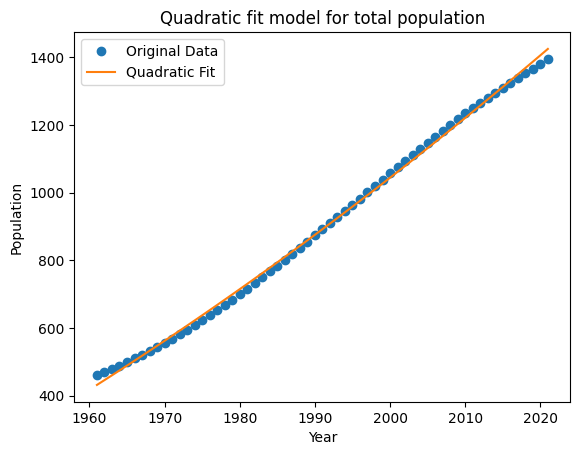

In [32]:
plt.figure(1)
plt.plot(years,population,'o',label='Original Data')
plt.plot(years,population_fitted,'-',label='Quadratic Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Quadratic fit model for total population')
plt.show()

In [33]:
population_increament=[]
difference_in_years=years[:-1]
for i in range(len(population)-1):
  population_increament.append(population[i+1]-population[i])
A_increament=[]
for t in difference_in_years:
  A_increament.append([t*t,t,1])


In [34]:
A_T_increase=matrix_transpose(A_increament)
A_T_A_increase=matrix_multiplication(A_T_increase,A_increament)
A_T_b_increase=matrix_multiplication(A_T_increase,[[p] for p in population_increament])
A_T_A_inverse_increase=matrix_inverse(A_T_A_increase)
x_total_increament=matrix_multiplication(A_T_A_inverse_increase,A_T_b_increase)
x1_total_increament=x_total_increament[0][0]
x2_total_increament=x_total_increament[1][0]
x3_total_increament=x_total_increament[2][0]

In [35]:
population_increament_fitted=[]
for t in difference_in_years:
  fitted=x1_total_increament*t*t+x2_total_increament*t+x3_total_increament
  population_increament_fitted.append(fitted)

In [36]:
print('Quadratic Model for Yearly Increment:')
print(f'x_1={x1_total_increament}')
print(f'x_2={x2_total_increament}')
print(f'x_3={x3_total_increament}')

Quadratic Model for Yearly Increment:
x_1=-0.008669256529174163
x_2=34.587870937772095
x_3=-34480.61596298218


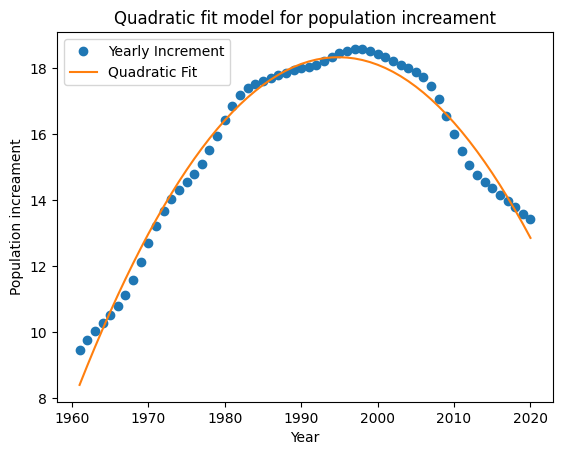

In [37]:
plt.figure(2)
plt.plot(difference_in_years,population_increament,'o',label='Yearly Increment')
plt.plot(difference_in_years,population_increament_fitted,'-',label='Quadratic Fit')
plt.xlabel('Year')
plt.ylabel('Population increament')
plt.legend()
plt.title('Quadratic fit model for population increament')
plt.show()